## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [ ]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [ ]:
cards = sample_cards(100, 6, 3)
cards

array([[18, 55, 87],
       [43, 57, 89],
       [59, 62, 94],
       [ 1, 68, 92],
       [40, 96, 98],
       [ 9, 54, 56]])

and access the cards of each player with 

In [ ]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

The lowest card in the game is

In [ ]:
np.min(cards)

In [ ]:
np.arange(1, 5)

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

(array([1.875e+03, 1.443e+03, 1.295e+03, 1.049e+03, 8.100e+02, 6.840e+02,
        5.420e+02, 4.130e+02, 3.480e+02, 2.860e+02, 2.280e+02, 1.980e+02,
        1.710e+02, 1.250e+02, 1.230e+02, 8.800e+01, 6.700e+01, 5.000e+01,
        4.100e+01, 3.300e+01, 3.300e+01, 1.400e+01, 2.500e+01, 1.200e+01,
        1.200e+01, 9.000e+00, 9.000e+00, 7.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 33., 34., 35., 37., 41.]),
 <BarContainer object of 35 artists>)

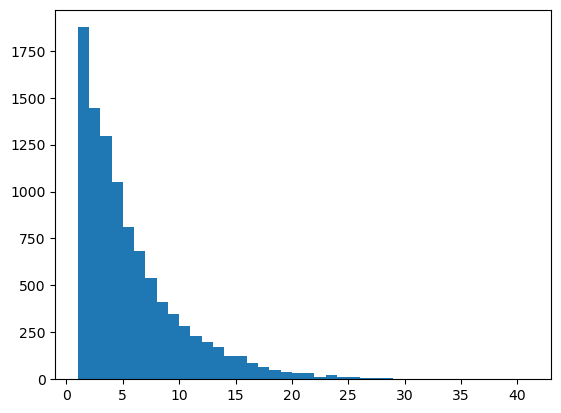

In [ ]:
# To Do cell

#set seed
np.random.seed(888)

#create empty list
lowest_card = []

#set up simulation
for x in range(0,10000):
    cards = sample_cards(100, 6, 3)
    
    #add lowest card to empty list
    lowest_card.append(np.min(cards))

#plot
plt.hist(lowest_card, bins = np.unique(lowest_card))

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

(array([3.000e+00, 2.600e+01, 7.800e+01, 2.080e+02, 4.340e+02, 7.010e+02,
        8.480e+02, 9.670e+02, 1.003e+03, 9.700e+02, 8.790e+02, 7.570e+02,
        5.990e+02, 5.480e+02, 4.410e+02, 3.560e+02, 2.720e+02, 2.120e+02,
        1.780e+02, 1.240e+02, 9.800e+01, 7.600e+01, 6.100e+01, 4.600e+01,
        3.300e+01, 2.700e+01, 1.300e+01, 1.700e+01, 9.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00]),
 array([ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.,
        20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
        33., 34., 35., 36., 37., 38., 39., 40., 41., 43., 45.]),
 <BarContainer object of 36 artists>)

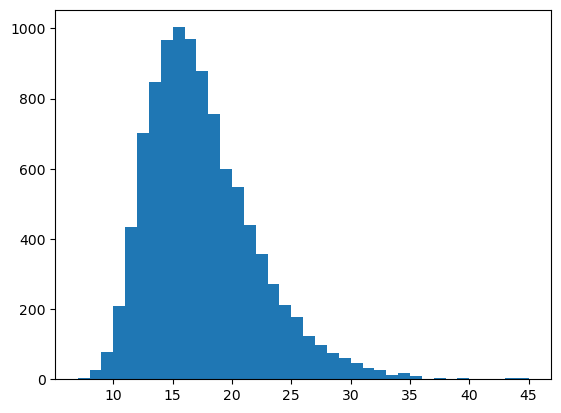

In [ ]:
# To Do cell

#set seed
np.random.seed(888)

#create empty list
biggest_gap = []

for x in range(0,10000):
    cards = sample_cards(100, 6, 3)
    
    #flatten cards into 1-D array and sort
    all_cards = np.sort(cards.flatten())
    
    #find difference between each pair of consecutive cards
    diffs = np.diff(all_cards)
    
    #add biggest gap to empty list
    biggest_gap.append(np.max(diffs))
    
biggest_gaps = np.array(biggest_gap)

#plot
plt.hist(biggest_gaps, bins = np.unique(biggest_gaps))

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

**The maximum number of numbers that a player will have to wait before playing the next card is 43 according to the below simulation with random seed 888.**

43


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 8.700e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.120e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.140e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.230e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        5.980e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.880e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.180e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.028e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 1.008e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.024e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.060e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.910e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 4.740e+0

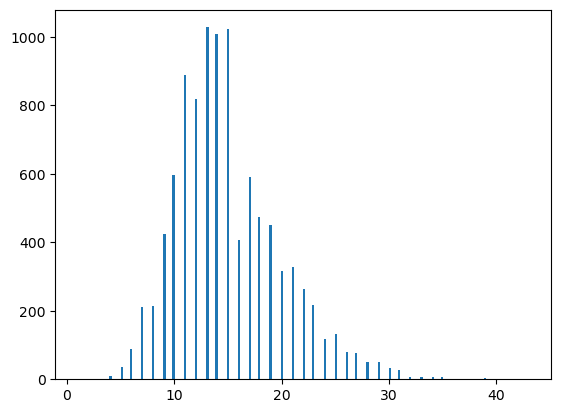

In [ ]:
#To do cell

#set seed
np.random.seed(888)


#create empty list
biggest_gapbtwn = []

#defining n,k, etc. this way so it's easier to repeat later
n = 6
k = 3
big_N = 100
cards_ig = k*n

for x in range(0,10000):
    #sample
    cards = sample_cards(big_N, n, k)
    
    #flatten to 1-D array and sort
    all_cards = np.sort(cards.flatten())
    
    diffs=[]
    
    #looping through the flattened array
    for i in range(0,cards_ig-1):  
        #calculating difference between each consecutive pair
        a = all_cards[i+1]
        b = all_cards[i]
        diff = a-b 
        #create empty list
        logic_test = []
        #loop through consecutive pairs 
        for i in range(0,len(cards)):  
            #check if consecutive pairs are in same person's hand
            if (a & b in cards[i,:]):
                logic_test.append("invalid")
            else: 
                logic_test.append("valid")
        #if the pair is not in one player's hand, save the difference
        if ("invalid" not in logic_test):
            diffs.append(diff)       
    biggest_gapbtwn.append(np.max(diffs))

biggest_gapsbtwn = np.array(biggest_gapbtwn)

#print largest consecutive difference
print(np.max(biggest_gapsbtwn))

#plot
plt.hist(biggest_gapsbtwn, bins = 200)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

**The reality is that the two simulations I ran above are not drastically different. The second simulation appears to be slightly less skewed. The means also appear to be different and the variance doesn't seem to vastly differ.**

**Below, I run 3 comparisons between simulations that compare across all cards and simulations that compare between players. Visually, the graphs seems to grow more similar as n goes up while k stays constant. When k increases, but n is constant, the graphs also grow visually similar, but not as much as when just n increases**

**After all of my histograms, I print a table of means of the two distributions with different n and k values.**

**There are a couple of interesting facets I can note. First, the difference in means grows as n and k shrink. Second, the means of the distribution of gaps that excludes gaps within a single player's hand have consistently lower means.*** 

**Intuitively what might be happening is that adding more cards to play reduces the greatest consecutive difference between players. First, there are more cards in play to begin with, there are fewer "undealt" cards, which reduces the space between cards. With smaller k, there is a higher chance of a bigger gap. Furthermore, with more cards in a persons hand, there are less "valid" consecutive gaps between players because many of the gaps may be within a single player's hand.**

**This might also be said for changing n. When n shrinks, the number of cards in play also reduces. This naturally makes the mean higher. However, unlike increasing k, increasing n does not increase the number of gaps contained within a single player's hand. Thus, the biggest gap is more dependent on the total number of cards at play. This might be why the two distributions are more similar when only n changes. The simulation that takes into account all cards in the game relies more on the total number of cards at play, which is similar to the role that changing n plays**

13


(array([1.400e+01, 3.350e+02, 3.025e+03, 2.531e+03, 2.439e+03, 1.031e+03,
        4.690e+02, 7.800e+01, 5.400e+01, 1.600e+01, 5.000e+00, 3.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 12 artists>)

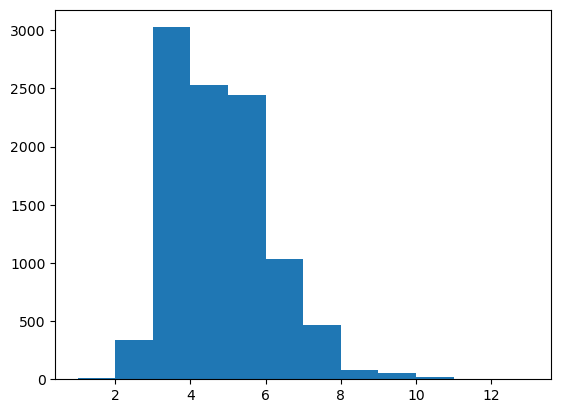

In [ ]:
# To Do cell

#between players
biggest_gapbtwn2 = []

np.random.seed(888)

n = 6
k = 10
big_N = 100
cards_ig = k*n

for x in range(0,10000):
    cards = sample_cards(big_N, n, k)
    all_cards = np.sort(cards.flatten())
    diffs=[]
    for i in range(0,cards_ig-1):
        a = all_cards[i+1]
        b = all_cards[i]
        diff = a-b
        logic_test = []
        for i in range(0,len(cards)):
            if (a & b in cards[i,:]):
                logic_test.append("invalid")
            else: 
                logic_test.append("valid")
        if ("invalid" not in logic_test):
            diffs.append(diff)
    biggest_gapbtwn2.append(np.max(diffs))

biggest_gapsbtwn2 = np.array(biggest_gapbtwn2)
print(np.max(biggest_gapsbtwn2))
plt.hist(biggest_gapsbtwn2,np.unique(biggest_gapsbtwn2))


(array([  42., 1776., 3842., 2558., 1171.,  386.,  151.,   50.,   15.,
           9.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 10 artists>)

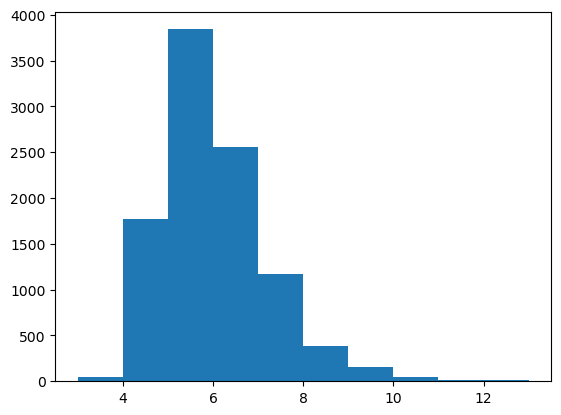

In [ ]:
#accross all cards

#set seed
np.random.seed(888)

#create empty list
biggest_gap2 = []

for x in range(0,10000):
    cards = sample_cards(100, 6, 10)
    
    #flatten cards into 1-D array and sort
    all_cards = np.sort(cards.flatten())
    
    #find difference between each pair of consecutive cards
    diffs = np.diff(all_cards)
    
    #add biggest gap to empty list
    biggest_gap2.append(np.max(diffs))
    
biggest_gaps2 = np.array(biggest_gap2)

#plot
plt.hist(biggest_gaps2, bins = np.unique(biggest_gaps2))

18


(array([1.200e+01, 3.690e+02, 9.780e+02, 2.325e+03, 2.335e+03, 2.125e+03,
        6.470e+02, 5.910e+02, 2.800e+02, 1.780e+02, 6.500e+01, 4.900e+01,
        2.700e+01, 1.300e+01, 1.000e+00, 5.000e+00]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18.]),
 <BarContainer object of 16 artists>)

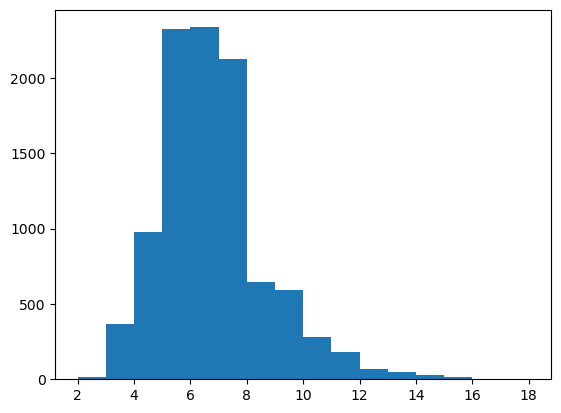

In [ ]:
#To do cell

#between players
biggest_gapbtwn3 = []

np.random.seed(888)

n = 15
k = 3
big_N = 100
cards_ig = k*n

for x in range(0,10000):
    cards = sample_cards(big_N, n, k)
    all_cards = np.sort(cards.flatten())
    diffs=[]
    for i in range(0,cards_ig-1):
        a = all_cards[i+1]
        b = all_cards[i]
        diff = a-b
        logic_test = []
        for i in range(0,len(cards)):
            if (a & b in cards[i,:]):
                logic_test.append("invalid")
            else: 
                logic_test.append("valid")
        if ("invalid" not in logic_test):
            diffs.append(diff)
    biggest_gapbtwn3.append(np.max(diffs))

biggest_gapsbtwn3 = np.array(biggest_gapbtwn3)
print(np.max(biggest_gapsbtwn3))
plt.hist(biggest_gapsbtwn3, bins = np.unique(biggest_gapsbtwn3))

(array([  14.,  592., 2128., 2634., 1995., 1264.,  649.,  345.,  178.,
         102.,   55.,   28.,    7.,    9.]),
 array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
        17., 18.]),
 <BarContainer object of 14 artists>)

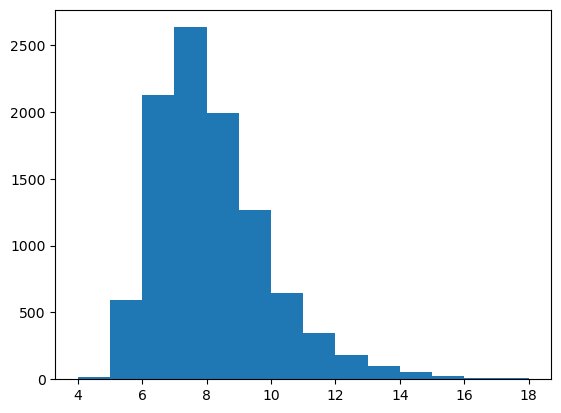

In [ ]:
#accross all cards

#set seed
np.random.seed(888)

#create empty list
biggest_gap3 = []

for x in range(0,10000):
    cards = sample_cards(100, 15, 3)
    
    #flatten cards into 1-D array and sort
    all_cards = np.sort(cards.flatten())
    
    #find difference between each pair of consecutive cards
    diffs = np.diff(all_cards)
    
    #add biggest gap to empty list
    biggest_gap3.append(np.max(diffs))
    
biggest_gaps3 = np.array(biggest_gap3)

#plot
plt.hist(biggest_gaps3, bins = np.unique(biggest_gaps3))

70


(array([  2.,  10.,  20.,  11.,  23.,  34.,  59.,  43.,  67.,  87., 132.,
        133., 204., 247., 269., 172., 333., 312., 423., 352., 475., 499.,
        541., 382., 487., 417., 431., 368., 403., 391., 346., 158., 226.,
        186., 233., 164., 159., 130., 164., 104., 125.,  92.,  98.,  56.,
         63.,  63.,  47.,  34.,  27.,  26.,  31.,  23.,  18.,  20.,  11.,
         15.,  10.,   5.,  12.,   4.,   9.,   4.,   3.,   1.,   2.,   4.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 65., 66.,
        67., 70.]),
 <BarContainer object of 66 artists>)

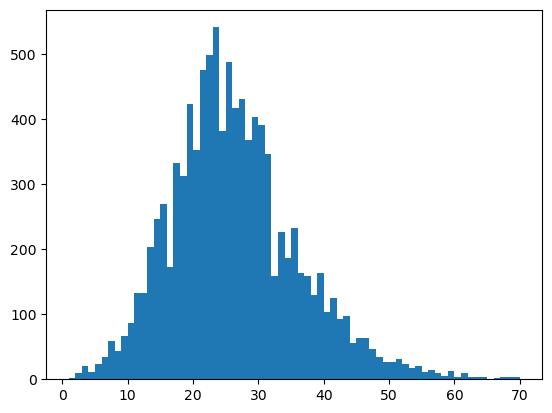

In [ ]:
#between players
biggest_gapbtwn4 = []

np.random.seed(888)

n = 4
k = 2
big_N = 100
cards_ig = k*n

for x in range(0,10000):
    cards = sample_cards(big_N, n, k)
    all_cards = np.sort(cards.flatten())
    diffs=[]
    for i in range(0,cards_ig-1):
        a = all_cards[i+1]
        b = all_cards[i]
        diff = a-b
        logic_test = []
        for i in range(0,len(cards)):
            if (a & b in cards[i,:]):
                logic_test.append("invalid")
            else: 
                logic_test.append("valid")
        if ("invalid" not in logic_test):
            diffs.append(diff)
    biggest_gapbtwn4.append(np.max(diffs))

biggest_gapsbtwn4 = np.array(biggest_gapbtwn4)
print(np.max(biggest_gapsbtwn4))
plt.hist(biggest_gapsbtwn4, bins = np.unique(biggest_gapsbtwn4))

(array([  2.,   4.,   9.,  15.,  22.,  38.,  70.,  98., 121., 162., 245.,
        280., 334., 380., 436., 484., 499., 497., 526., 486., 469., 449.,
        433., 455., 370., 351., 329., 264., 290., 223., 197., 163., 183.,
        145., 148., 116., 111.,  68.,  78.,  73.,  54.,  50.,  32.,  32.,
         33.,  26.,  18.,  23.,  14.,  17.,  14.,   5.,  13.,   6.,  10.,
          4.,   3.,   9.,   5.,   2.,   3.,   2.,   2.]),
 array([ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.,
        20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
        33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45.,
        46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58.,
        59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 70., 79.]),
 <BarContainer object of 63 artists>)

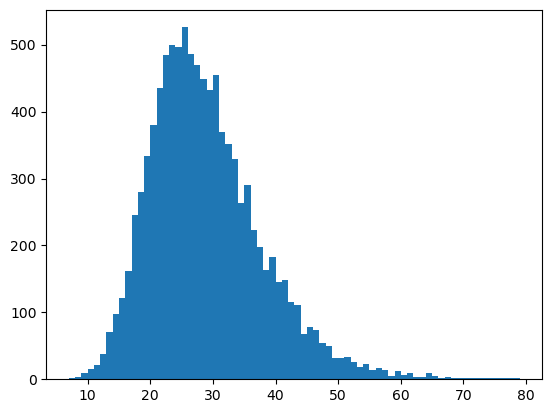

In [ ]:
#accross all cards

#set seed
np.random.seed(888)

#create empty list
biggest_gap4 = []

for x in range(0,10000):
    cards = sample_cards(100, 4, 2)
    
    #flatten cards into 1-D array and sort
    all_cards = np.sort(cards.flatten())
    
    #find difference between each pair of consecutive cards
    diffs = np.diff(all_cards)
    
    #add biggest gap to empty list
    biggest_gap4.append(np.max(diffs))
    
biggest_gaps4 = np.array(biggest_gap4)

#plot
plt.hist(biggest_gaps4, bins = np.unique(biggest_gaps4))

In [ ]:
import pandas as pd
#means of simulation accross all cards
acc_cards = np.array([np.mean(biggest_gaps),
                      np.mean(biggest_gaps2),
                      np.mean(biggest_gaps3),
                      np.mean(biggest_gaps4)])

#means of simulation accross players
acc_play = np.array([np.mean(biggest_gapsbtwn),
                     np.mean(biggest_gapsbtwn2),
                     np.mean(biggest_gapsbtwn3),
                     np.mean(biggest_gapsbtwn4)])

ns = np.array([6,6,15,4])
ks = np.array([3,10,3,2])

table_means = pd.DataFrame({'acc_cards':acc_cards,
                            'acc_play':acc_play,
                           'ns': ns,
                           'ks':ks})
table_means


,acc_cards,acc_play,ns,ks
0,17.0108,15.0086,6,3
1,5.5208,4.2909,6,10
2,7.6762,6.2898,15,3
3,28.3798,25.8297,4,2


### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

In [ ]:
def sample_cards_wr(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

([<matplotlib.axis.XTick at 0x7fd19267c4c0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

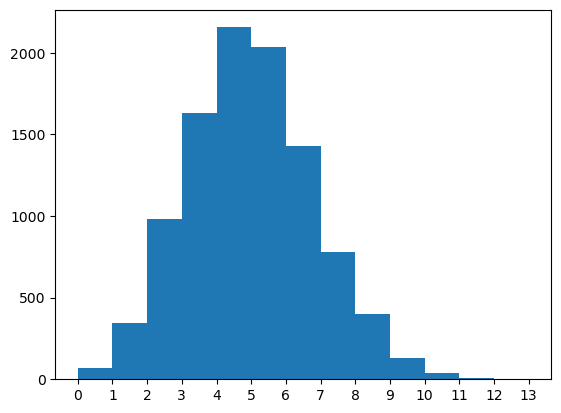

In [ ]:
# To Do cell

#In 18 trials (cards dealt in one game) 
#with replacement, 
#the number of occurrences of
#even numbers greater than 50
#follows a binomial distribution

#in this case the parameter p = 1/4

np.random.seed(888)

successes = []

for x in range(0,10000):
    cards = sample_cards_wr(100, 6, 3)
    new_cards = cards.flatten()
    count = 0
    for i in range(0,len(new_cards)):
        if(new_cards[i]>50 and new_cards[i]%2==0):
            count = count +1
        else:
            count = count +0
    successes.append(count)

plt.hist(successes,bins = np.arange(0,14,1))
plt.xticks(np.arange(0,14,1))


([<matplotlib.axis.XTick at 0x7fd1923d93d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

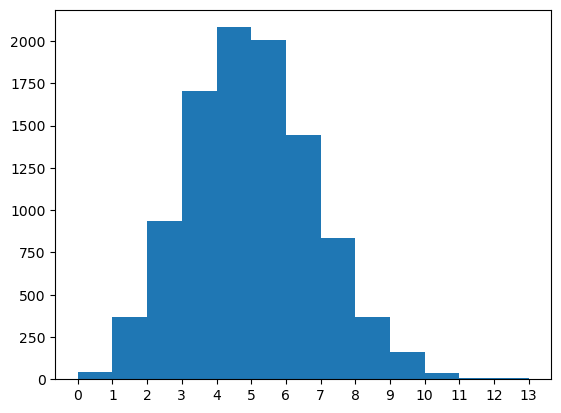

In [ ]:
np.random.seed(888)

s = np.random.binomial(18, 0.25,10000)
plt.hist(s, bins = np.arange(0,14,1))
plt.xticks(np.arange(0,14,1))


([<matplotlib.axis.XTick at 0x7fd1925476d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

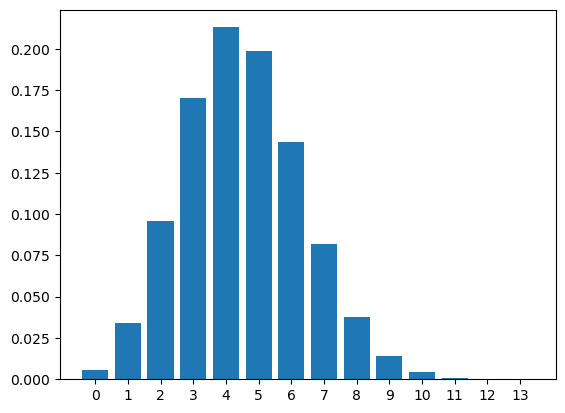

In [ ]:
from scipy.stats import binom
np.random.seed(888)
x = np.arange(0,14,1).astype(int)
rv = binom.pmf(x,n = 18, p = 0.25)

plt.bar(x, rv)
plt.xticks(np.arange(0,14,1))


### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

**The distribution of the lowest number is very similar to the distribution of the minimum order statistic of 18 order statistics of the uniform [0,1] distribution. While the lowest number distribution is not exactly following Uniform [0,1], drawing a single card from 100 is still a form of uniform distribution [0,N]. Thus, the two distributions are somewhat similar. For the Beta distribution, k = 1, meaning the first order statistic (lowest number), and n+1-k is n or 18.** 

(array([1.622e+03, 1.370e+03, 1.204e+03, 9.910e+02, 8.780e+02, 6.870e+02,
        5.180e+02, 5.280e+02, 3.850e+02, 3.250e+02, 2.560e+02, 2.560e+02,
        1.860e+02, 1.430e+02, 1.290e+02, 1.020e+02, 7.800e+01, 6.500e+01,
        6.400e+01, 4.400e+01, 3.100e+01, 3.100e+01, 2.300e+01, 1.300e+01,
        1.600e+01, 1.700e+01, 1.300e+01, 3.000e+00, 9.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.50450480e-05, 9.97703158e-03, 1.99390181e-02, 2.99010046e-02,
        3.98629912e-02, 4.98249777e-02, 5.97869642e-02, 6.97489507e-02,
        7.97109373e-02, 8.96729238e-02, 9.96349103e-02, 1.09596897e-01,
        1.19558883e-01, 1.29520870e-01, 1.39482856e-01, 1.49444843e-01,
        1.59406829e-01, 1.69368816e-01, 1.79330803e-01, 1.89292789e-01,
        1.99254776e-01, 2.09216762e-01, 2.19178749e-01, 2.29140735e-01,
        2.39102722e-01, 2.49064708e-01, 2.59026695e-01, 2.68988681e-01

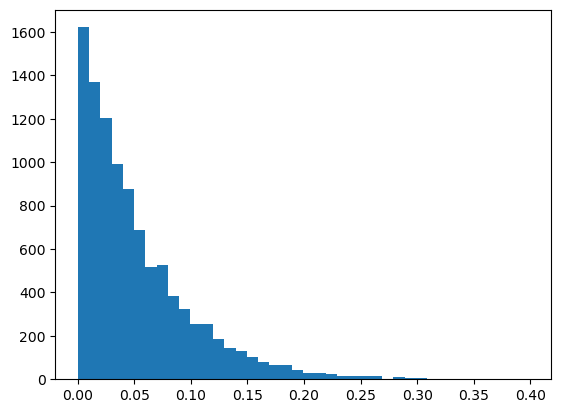

In [ ]:
# To Do cell

np.random.seed(888)

s = np.random.beta(1,18, size = 10000)
plt.hist(s, bins = 40)

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

**If you compare the two distributions they look almost identical, not just in shape but in magnitude as well** 

(array([1.875e+03, 1.443e+03, 1.295e+03, 1.049e+03, 8.100e+02, 6.840e+02,
        5.420e+02, 4.130e+02, 3.480e+02, 2.860e+02, 2.280e+02, 1.980e+02,
        1.710e+02, 1.250e+02, 1.230e+02, 8.800e+01, 6.700e+01, 5.000e+01,
        4.100e+01, 3.300e+01, 3.300e+01, 1.400e+01, 2.500e+01, 1.200e+01,
        1.200e+01, 9.000e+00, 9.000e+00, 7.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([0.01005034, 0.02020271, 0.03045921, 0.04082199, 0.05129329,
        0.0618754 , 0.07257069, 0.08338161, 0.09431068, 0.10536052,
        0.11653382, 0.12783337, 0.13926207, 0.15082289, 0.16251893,
        0.17435339, 0.18632958, 0.19845094, 0.21072103, 0.22314355,
        0.23572233, 0.24846136, 0.26136476, 0.27443685, 0.28768207,
        0.30110509, 0.31471074, 0.32850407, 0.34249031, 0.35667494,
        0.37106368, 0.40047757, 0.41551544, 0.43078292, 0.46203546,
        0.52763274]),
 <BarContainer object of 35 artists>)

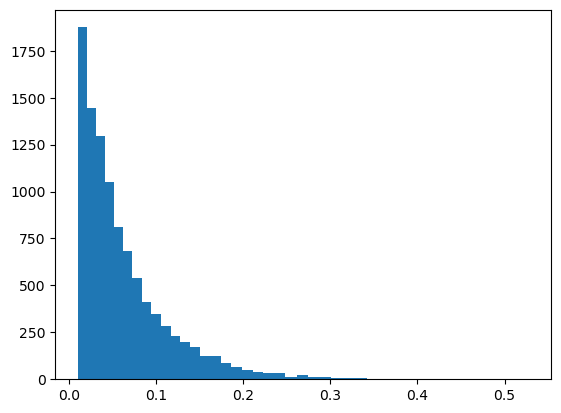

In [ ]:
#drawing cards

#set seed
np.random.seed(888)

#create empty list
lowest_card_transformed = []

#set up simulation
for x in range(0,10000):
    cards = sample_cards(100, 6, 3)
    min_1 = np.min(cards)
    big_X = -np.log(1-(min_1/100))
    #add lowest card to empty list
    lowest_card_transformed.append(big_X)

#plot
plt.hist(lowest_card_transformed, bins = np.unique(lowest_card_transformed))

(array([1.808e+03, 1.481e+03, 1.190e+03, 9.640e+02, 8.230e+02, 6.770e+02,
        5.530e+02, 4.520e+02, 3.930e+02, 2.920e+02, 2.450e+02, 1.920e+02,
        1.690e+02, 1.520e+02, 9.300e+01, 8.900e+01, 8.100e+01, 5.900e+01,
        4.000e+01, 4.700e+01, 4.200e+01, 2.600e+01, 2.600e+01, 2.200e+01,
        1.800e+01, 1.700e+01, 1.000e+01, 4.000e+00, 6.000e+00, 6.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([2.31196021e-05, 1.11725219e-02, 2.23219241e-02, 3.34713264e-02,
        4.46207287e-02, 5.57701310e-02, 6.69195332e-02, 7.80689355e-02,
        8.92183378e-02, 1.00367740e-01, 1.11517142e-01, 1.22666545e-01,
        1.33815947e-01, 1.44965349e-01, 1.56114751e-01, 1.67264154e-01,
        1.78413556e-01, 1.89562958e-01, 2.00712361e-01, 2.11861763e-01,
        2.230111

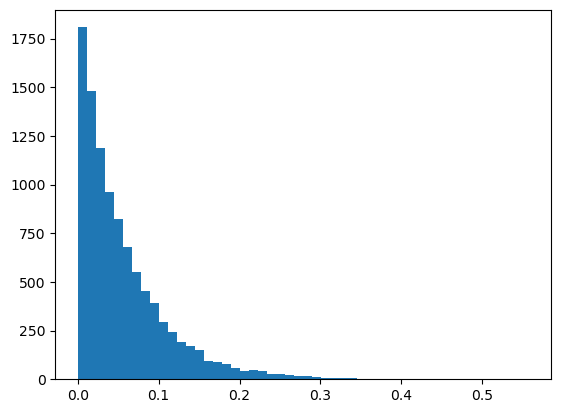

In [ ]:
#simulation
np.random.seed(888)

plt.hist(np.random.exponential(1/18, size = 10000), bins = 50)

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

**Above I have already discussed scenarios where the number of cards in the game is increased. In such a case, the largest consecutive gap decreases because the cards are drawn without replacement. As n times k grows increasingly smaller relative to N, the size of the largest consecutive gap increases. With less people and cards in play, there is a higher chance of dealing cards that are far apart. This was mainly for the case of without replacement**

**As n times k gets smaller for draws with replacement, one interesting occurrence is that it can get to the point where there is no consecutive gap that is not within a players hand. What I mean is, for example, if there are only two cards in each players hand, and small number of players, it can be possible for all players to have the same cards when drawing with replacement. That is why below, the example with 4 players and 2 cards does not produce a graph! The code breaks when it encounters a case where there are no consecutive gaps that are not in a single player's hand.**

**However, this still doesn't really address the case where n times k is much much smaller than N. In order to observe this, I created some final code chunks that compared sampling with and without replacement. However, I increase big N to 1000 and kept n times k relatively small. This allowed me to show a scenario when n times k is much much smaller than N. After I did this, I saw that the distributions with and without replacement appeared nearly identical. This goes to show that as the population size grows relative to the sample size, the difference between drawing with and without replacement grows minimal/insignificant.**

In [ ]:
# To Do cell

#I have chosen n and k such that this code will break
#in the model without replacement, the code will not break. 
#With replacement, there are no consecutive differences not within 
#within a single players hands. 

#between players
biggest_gapbtwn4_wr = []

np.random.seed(888)

n = 4
k = 2
big_N = 100
cards_ig = k*n

for x in range(0,10000):
    cards = sample_cards_wr(big_N, n, k)
    all_cards = np.sort(cards.flatten())
    diffs=[]
    for i in range(0,cards_ig-1):
        a = all_cards[i+1]
        b = all_cards[i]
        diff = a-b
        logic_test = []
        for i in range(0,len(cards)):
            if (a & b in cards[i,:]):
                logic_test.append("invalid")
            else: 
                logic_test.append("valid")
        if ("invalid" not in logic_test):
            diffs.append(diff)
    biggest_gapbtwn4_wr.append(np.max(diffs))

biggest_gapsbtwn4_wr = np.array(biggest_gapbtwn4_wr)
print(np.max(biggest_gapsbtwn4_wr))
plt.hist(biggest_gapsbtwn4_wr, bins = np.unique(biggest_gapsbtwn4_wr))


ValueError: zero-size array to reduction operation maximum which has no identity

513


(array([8.500e+01, 2.100e+03, 4.053e+03, 2.412e+03, 9.140e+02, 3.010e+02,
        9.800e+01, 2.600e+01, 8.000e+00, 3.000e+00]),
 array([ 42. ,  89.1, 136.2, 183.3, 230.4, 277.5, 324.6, 371.7, 418.8,
        465.9, 513. ]),
 <BarContainer object of 10 artists>)

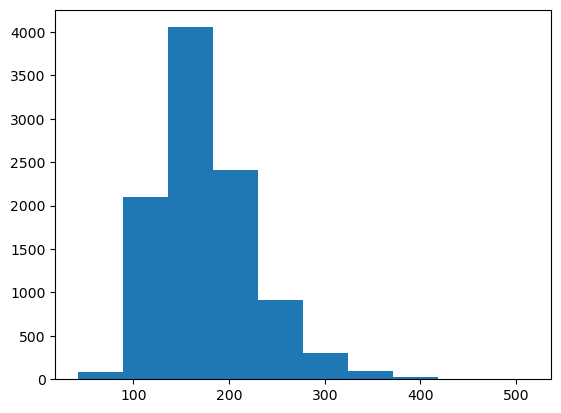

In [ ]:
#I have increased big N by a lot and draw with replacement
biggest_gapbtwn5 = []

np.random.seed(888)

n = 3
k = 6
big_N = 1000
cards_ig = k*n

for x in range(0,10000):
    cards = sample_cards_wr(big_N, n, k)
    all_cards = np.sort(cards.flatten())
    diffs=[]
    for i in range(0,cards_ig-1):
        a = all_cards[i+1]
        b = all_cards[i]
        diff = a-b
        logic_test = []
        for i in range(0,len(cards)):
            if (a & b in cards[i,:]):
                logic_test.append("invalid")
            else: 
                logic_test.append("valid")
        if ("invalid" not in logic_test):
            diffs.append(diff)
    biggest_gapbtwn5.append(np.max(diffs))

biggest_gapsbtwn5 = np.array(biggest_gapbtwn5)
print(np.max(biggest_gapsbtwn5))
plt.hist(biggest_gapsbtwn5)#, bins = np.unique(biggest_gapsbtwn5))

476


(array([1.640e+02, 2.239e+03, 3.558e+03, 2.425e+03, 1.015e+03, 4.020e+02,
        1.310e+02, 4.600e+01, 1.700e+01, 3.000e+00]),
 array([ 53. ,  95.3, 137.6, 179.9, 222.2, 264.5, 306.8, 349.1, 391.4,
        433.7, 476. ]),
 <BarContainer object of 10 artists>)

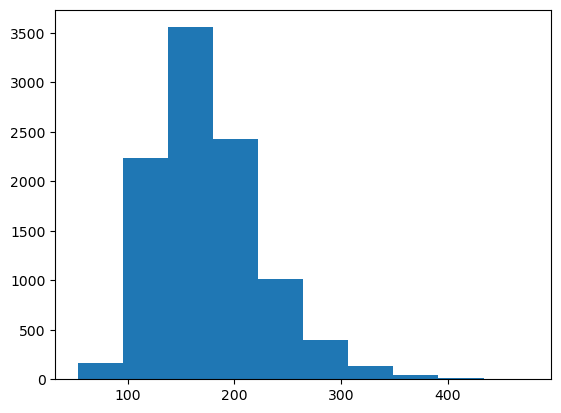

In [ ]:
#I have increased big N by a lot and draw without replacement

biggest_gapbtwn6 = []

np.random.seed(888)

n = 3
k = 6
big_N = 1000
cards_ig = k*n

for x in range(0,10000):
    cards = sample_cards(big_N, n, k)
    all_cards = np.sort(cards.flatten())
    diffs=[]
    for i in range(0,cards_ig-1):
        a = all_cards[i+1]
        b = all_cards[i]
        diff = a-b
        logic_test = []
        for i in range(0,len(cards)):
            if (a & b in cards[i,:]):
                logic_test.append("invalid")
            else: 
                logic_test.append("valid")
        if ("invalid" not in logic_test):
            diffs.append(diff)
    biggest_gapbtwn6.append(np.max(diffs))

biggest_gapsbtwn6 = np.array(biggest_gapbtwn6)
print(np.max(biggest_gapsbtwn6))
plt.hist(biggest_gapsbtwn6)#, bins = np.unique(biggest_gapsbtwn6))

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Julia Verdickt (Github username: juliaverdickt) 
- Member No2: 
- Member No3: